In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
correlation = df.corr()

<AxesSubplot:>

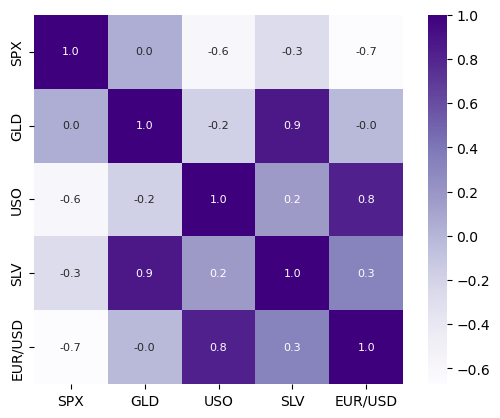

In [10]:
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Purples")

In [11]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#### We then check the distribution of the gold price

<AxesSubplot:xlabel='GLD', ylabel='Count'>

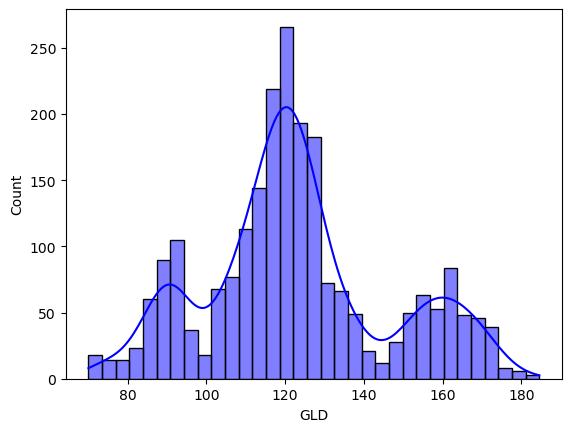

In [15]:
sns.histplot(df["GLD"], kde=True, color="blue")

In [16]:
X = df.drop(["Date", "GLD"], axis = 1)
y = df["GLD"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [19]:
model = RandomForestRegressor(n_estimators=100)

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor()

### Test data prediction

In [21]:
test_data_pred = model.predict(X_test)

In [22]:
test_data_pred

array([168.66309985,  81.88509979, 116.16460073, 127.6794007 ,
       120.63530117, 154.8068971 , 150.16699823, 126.16940007,
       117.51979852, 126.09870036, 116.77020103, 171.63160083,
       140.81949789, 167.87289896, 115.31720005, 117.71280061,
       139.62800262, 170.44670123, 159.29630303, 157.93809892,
       154.91919976, 125.29419983, 175.8173994 , 156.90420292,
       125.16570032,  93.74259965,  77.60080006, 120.3845001 ,
       119.00339917, 167.51499996,  88.07619998, 125.46140013,
        91.2195007 , 117.58120045, 121.14069933, 136.01650123,
       115.39890095, 115.73130055, 145.41679907, 107.36300087,
       104.49710238,  87.1787976 , 126.52110049, 117.82699959,
       153.07779925, 119.4546005 , 108.46639945, 108.09559864,
        93.06040055, 127.16739784,  74.65240038, 113.56539912,
       121.11240035, 111.29349891, 118.92599881, 120.61609933,
       159.58180033, 168.65100112, 146.98789669,  85.71079836,
        94.27090033,  86.95669907,  90.72480015, 118.98

In [28]:
error_score = metrics.r2_score(y_test, test_data_pred)
print(f"Accuracy of model is: {error_score *100}%")

Accuracy of model is: 98.9258845610242%


### Lets compare the actual values and the predicted values
Since the y_test is a pandas Dataframe, we convert it to a list.

In [29]:
y_test = list(y_test)

In [30]:
y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

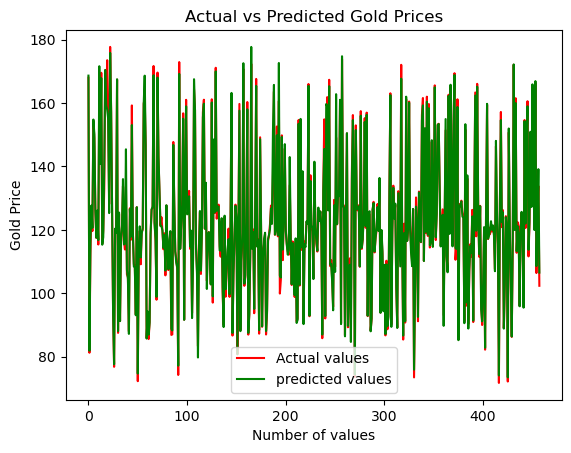

In [32]:
plt.plot(y_test, color="red", label="Actual values")
plt.plot(test_data_pred, color="green", label="predicted values")
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()